In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.cosmology import LambdaCDM

In [4]:
cosmo = LambdaCDM(H0=100, Om0=0.3089, Ode0=0.6911)
cosmomice = LambdaCDM(H0=100, Om0=0.25, Ode0=0.75)

In [5]:
L_mg = np.loadtxt('cats/voids_MG_Mr-21_Delta-0.8.dat').T
L_gr = np.loadtxt('cats/voids_GR_Mr-21_Delta-0.8.dat').T
L_mice = np.loadtxt('../../FAMAF/Lensing/cats/MICE/voids_MICE.dat').T

In [6]:
L_mg = L_mg[:,L_mg[11] >= 2.0]
L_gr = L_gr[:,L_gr[11] >= 2.0]
L_mice = L_mice[:,L_mice[11] >= 2.0]

In [7]:
rvmin_mg, rvmax_mg = np.amin(L_mg[0]), np.amax(L_mg[0])
rvmin_gr, rvmax_gr = np.amin(L_gr[0]), np.amax(L_gr[0])
rvmin_mice, rvmax_mice = np.amin(L_mice[1]), np.amax(L_mice[1])

In [8]:
print('MG: ' ,rvmin_mg, rvmax_mg)
print('GR: ' ,rvmin_gr, rvmax_gr)
print('MICE: ' ,rvmin_mice, rvmax_mice)

MG:  7.39937 44.16599
GR:  7.76734 45.17071
MICE:  5.86963 31.6965


In [9]:
M = 6
rvbins = np.logspace(np.log10(rvmin_mg), np.log10(rvmax_gr), M)
### probar hacer una división en quintiles en lugar de linspace
print(rvbins)
masks_mg = np.array([ (L_mg[0]>=rvbins[j]) & ( L_mg[0]<rvbins[j+1]) for j in range(M-1) ])
masks_gr = np.array([ (L_gr[0]>=rvbins[j]) & ( L_gr[0]<rvbins[j+1]) for j in range(M-1) ])
masks_mice = np.array([ (L_mice[1]>=rvbins[j]) & ( L_mice[1]<rvbins[j+1]) for j in range(M-1) ])

[ 7.39937    10.62495695 15.25666511 21.90746104 31.45752007 45.17071   ]


In [33]:
Rv = np.array([[rvbins[j],rvbins[j+1]] for j in range(M-1)])
print(Rv)

[[ 7.39937    10.62495695]
 [10.62495695 15.25666511]
 [15.25666511 21.90746104]
 [21.90746104 31.45752007]
 [31.45752007 45.17071   ]]


(array([291., 149.,  78.,  53.,  36.,  11.,   6.,   3.,   2.,   4.]),
 array([31.46408 , 32.734271, 34.004462, 35.274653, 36.544844, 37.815035,
        39.085226, 40.355417, 41.625608, 42.895799, 44.16599 ]),
 <BarContainer object of 10 artists>)

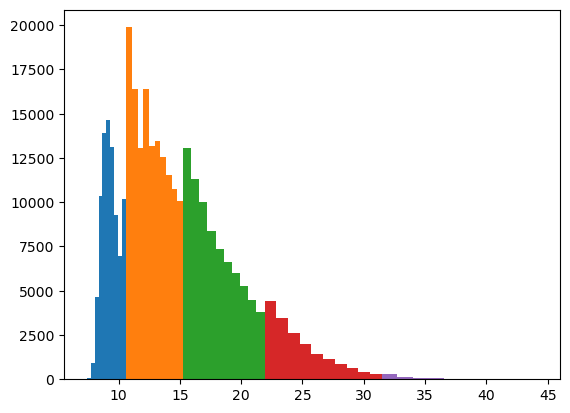

In [26]:
plt.hist((L_mg[0,masks_mg[0]]),bins=10)
plt.hist((L_mg[0,masks_mg[1]]),bins=10)
plt.hist((L_mg[0,masks_mg[2]]),bins=10)
plt.hist((L_mg[0,masks_mg[3]]),bins=10)
plt.hist((L_mg[0,masks_mg[4]]),bins=10)

In [10]:
N = 50
zbins = np.linspace(0.1,0.6,N)
z = zbins[:-1] + np.diff(zbins)*0.5
comdist = cosmo.comoving_distance(zbins).value
comdist_mice = cosmomice.comoving_distance(zbins).value
x = comdist[:-1] + np.diff(comdist)*0.5
x_mice = comdist_mice[:-1] + np.diff(comdist_mice)*0.5
volcom = np.array([4/3 * np.pi * (comdist[j+1]**3 - comdist[j]**3) for j in range(N-1)])
volcom_mice = np.array([4/3 * np.pi * (comdist_mice[j+1]**3 - comdist_mice[j]**3) for j in range(N-1)]) / 8

In [11]:
vdist_mg = np.array([np.sqrt(np.sum(L_mg[4:7, masks_mg[j]]**2,axis=0)) for j in range(M-1)])
vdist_gr = np.array([np.sqrt(np.sum(L_gr[4:7, masks_gr[j]]**2,axis=0)) for j in range(M-1)])
vdist_mice = np.array([np.sqrt(np.sum(L_mice[5:8, masks_mice[j]]**2,axis=0)) for j in range(M-1)])

/tmp/ipykernel_19961/769621352.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  vdist_mg = np.array([np.sqrt(np.sum(L_mg[4:7, masks_mg[j]]**2,axis=0)) for j in range(M-1)])
/tmp/ipykernel_19961/769621352.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  vdist_gr = np.array([np.sqrt(np.sum(L_gr[4:7, masks_gr[j]]**2,axis=0)) for j in range(M-1)])
/tmp/ipykernel_19961/769621352.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) 

In [12]:
nv_mg = np.array([
    [np.sum((vdist_mg[i] >= comdist[j]) & (vdist_mg[i] < comdist[j+1])) for j in range(N-1)] for i in range(M-1)
])

v_den_mg = nv_mg / volcom
err_v_den_mg = nv_mg/(np.sqrt(nv_mg)*volcom)

/tmp/ipykernel_19961/279768038.py:6: RuntimeWarning: invalid value encountered in divide
  err_v_den_mg = nv_mg/(np.sqrt(nv_mg)*volcom)


In [13]:
nv_gr = np.array([
    [np.sum((vdist_gr[i] >= comdist[j]) & (vdist_gr[i] < comdist[j+1])) for j in range(N-1)] for i in range(M-1)
])

v_den_gr = nv_gr / volcom
err_v_den_gr = nv_gr/(np.sqrt(nv_gr)*volcom)

/tmp/ipykernel_19961/2137770153.py:6: RuntimeWarning: invalid value encountered in divide
  err_v_den_gr = nv_gr/(np.sqrt(nv_gr)*volcom)


In [14]:
nv_mice = np.array([
    [np.sum((vdist_mice[i] >= comdist_mice[j]) & (vdist_mice[i] < comdist_mice[j+1])) for j in range(N-1)] for i in range(M-1)
]) / volcom_mice

v_den_mice = nv_mice / volcom_mice
err_v_den_mice = nv_mice / (np.sqrt(nv_mice) * volcom_mice)

/tmp/ipykernel_19961/94269839.py:6: RuntimeWarning: invalid value encountered in divide
  err_v_den_mice = nv_mice / (np.sqrt(nv_mice) * volcom_mice)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


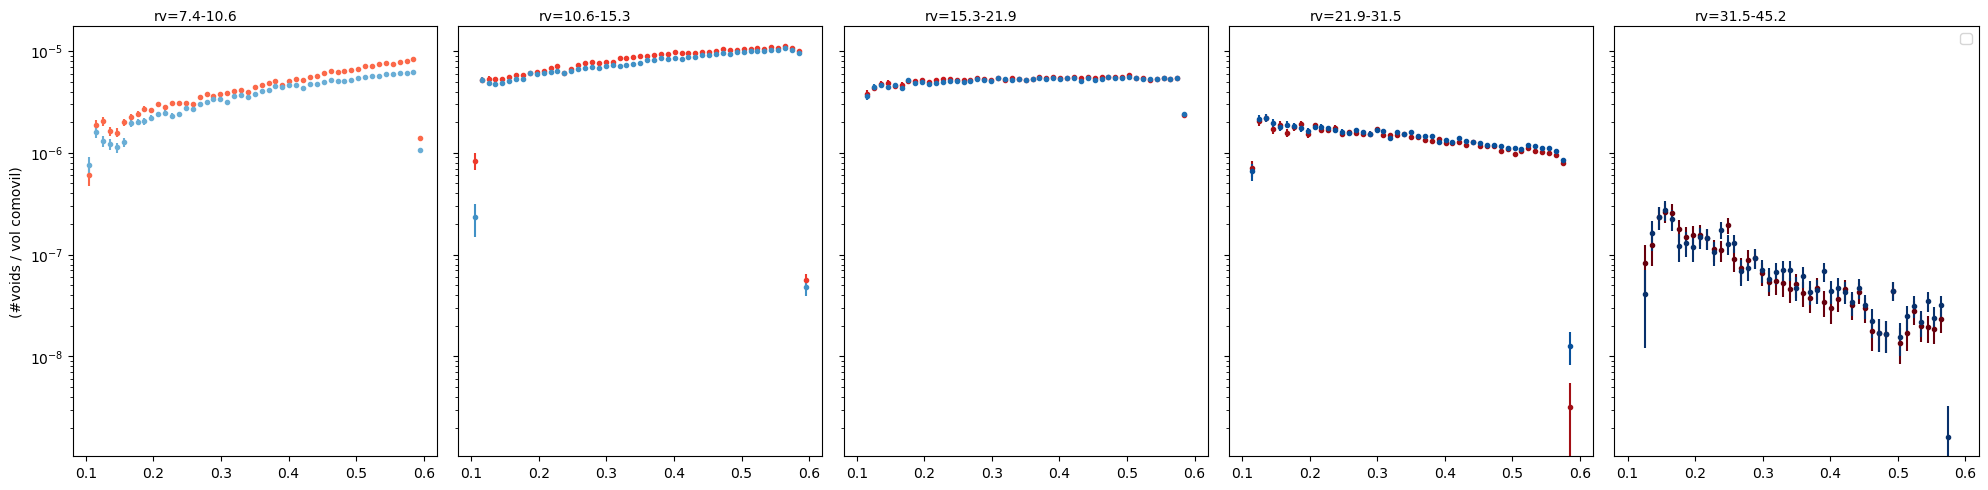

In [15]:
fig, axes = plt.subplots(1,M-1,figsize=(20,5), sharey=True, layout='tight')

colormap = plt.cm.Reds
colors = [colormap(i) for i in np.linspace(0.5, 1,M-1)]
for i in range(M-1):
    axes[i].errorbar(z, v_den_mg[i], yerr=err_v_den_mg[i], c=colors[i], fmt='.')

colormap = plt.cm.Blues 
colors = [colormap(i) for i in np.linspace(0.5, 1,M-1)]
for i in range(M-1):
    axes[i].errorbar(z, v_den_gr[i], yerr=err_v_den_gr[i], c=colors[i], fmt='.')

# colormap = plt.cm.Greens 
# colors = [colormap(i) for i in np.linspace(0.5, 1,M-1)]
# for i in range(M-1):
#     axes[i].plot(z, v_den_mice[i], c=colors[i])

for i in range(M-1):
    axes[i].text(0.2, 2e-5, f'rv={np.round(rvbins[i],1)}-{np.round(rvbins[i+1],1)}')

# plt.xlabel('redshift')
axes[0].set_ylabel('(#voids / vol comovil)')
plt.semilogy()
plt.legend()
plt.show()